# **Résolution du Problème du Voyageur de Commerce avec Python (Branch and Bound)**

# **Introduction**


Le problème du voyageur de commerce est un problème NP-complet classique en optimisation combinatoire où l'objectif est de trouver le chemin le plus court qui visite chaque ville exactement une fois et retourne à la ville de départ. Dans ce notebook, nous abordons ce problème en utilisant deux approches principales : l'algorithme du plus proche voisin pour obtenir une solution initiale et la méthode de branch and bound pour améliorer cette solution.



# **Importation des modules et des données :**
Dans cette section, nous importons les modules nécessaires à l'exécution de notre code. Nous utilisons xml.etree.ElementTree, qui est une bibliothèque Python destinée à la manipulation et à l'analyse de documents XML, ainsi que numpy, scipy et matplotlib pour effectuer des calculs et visualiser les résultats.

In [7]:
import os
import numpy as np
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.sparse import csr_matrix
maxsize = float('inf')
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# **Chargement des Données et Construction de la Matrice des Distances :**

---


Dans cette partie du code, nous chargeons les données à partir d'un fichier XML qui contient les informations sur les villes et leurs coordonnées. Nous utilisons la bibliothèque xml.etree.ElementTree pour parcourir le fichier XML et extraire ces données nécessaires. Après avoir initialisé une matrice des distances de taille appropriée, nous parcourons chaque nœud dans le fichier XML pour obtenir les informations sur les arêtes connectées à chaque ville. Nous utilisons ces informations pour remplir la matrice des distances, où chaque élément de la matrice représente le coût pour se rendre d'une ville à une autre. Enfin, nous affichons la matrice des distances pour vérifier que les données ont été correctement chargées. Cette étape est cruciale car elle prépare les données nécessaires pour résoudre le problème du voyageur de commerce.

In [8]:
# Charger le fichier XML
tree = ET.parse('data.xml')
root = tree.getroot()

# Initialiser la matrice des distances
nombre_villes = 17
matrice_distances = np.zeros((nombre_villes, nombre_villes))

# Remplir la matrice des distances
for i, vertex in enumerate(root.find('graph').findall('vertex')):
    for edge in vertex.findall('edge'):
        j = int(edge.text)  # L'indice de la ville de destination
        cost = float(edge.get('cost'))  # Le coût pour se rendre à cette ville
        matrice_distances[i, j] = cost


# Afficher la matrice des distances
print(matrice_distances)

[[ 0. 10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80. 85.]
 [10.  0. 18. 25. 35. 45. 55. 50. 40. 30. 20. 25. 40. 50. 55. 60. 65.]
 [15. 18.  0. 17. 22. 35. 42. 47. 60. 55. 50. 45. 40. 35. 30. 27. 20.]
 [20. 25. 17.  0. 14. 27. 30. 37. 42. 49. 55. 60. 65. 70. 75. 80. 85.]
 [25. 35. 22. 14.  0. 12. 20. 28. 30. 35. 40. 45. 50. 55. 60. 65. 70.]
 [30. 45. 35. 27. 12.  0. 15. 22. 25. 30. 35. 40. 45. 50. 55. 60. 65.]
 [35. 55. 42. 30. 20. 15.  0. 10. 18. 25. 30. 35. 40. 45. 50. 55. 60.]
 [40. 50. 47. 37. 28. 22. 10.  0. 14. 20. 25. 30. 35. 40. 45. 50. 55.]
 [45. 40. 60. 42. 30. 25. 18. 14.  0. 12. 17. 22. 27. 32. 37. 42. 47.]
 [50. 30. 55. 49. 35. 30. 25. 20. 12.  0. 14. 17. 20. 25. 30. 35. 40.]
 [55. 20. 50. 55. 40. 35. 30. 25. 17. 14.  0. 10. 15. 20. 25. 30. 35.]
 [60. 25. 45. 60. 45. 40. 35. 30. 22. 17. 10.  0. 12. 15. 20. 25. 30.]
 [65. 40. 40. 65. 50. 45. 40. 35. 27. 20. 15. 12.  0. 10. 15. 20. 25.]
 [70. 50. 35. 70. 55. 50. 45. 40. 32. 25. 20. 15. 10.  0. 10. 15. 20.]
 [75. 

# **Calcul de la Borne Inférieure :**
Cette fonction calcule une borne inférieure pour le chemin actuel. Voici une explication des étapes impliquées :


**- Calcul du Coût du Chemin Partiel :**

Nous calculons d'abord le coût du chemin partiel en additionnant les distances entre chaque paire de villes consécutives dans le chemin. Cela nous donne une estimation du coût total du chemin jusqu'à présent.


**- Identification des Villes Non Visitées :**

Nous déterminons ensuite les villes qui n'ont pas encore été visitées en soustrayant l'ensemble des villes déjà visitées du total des villes disponibles.


**- Calcul de l'Arbre Couvrant Minimal (ACM) :**

Si des villes non visitées existent, nous créons une matrice des distances réduite contenant uniquement les distances entre ces villes non visitées. Ensuite, nous utilisons l'algorithme de l'arbre couvrant minimal pour trouver un chemin qui relie ces villes de manière optimale. Nous calculons le coût total de cet ACM.


**- Ajout du Coût de l'ACM à la Borne Inférieure :**

 Nous ajoutons le coût de l'ACM au coût du chemin partiel pour obtenir une borne inférieure.

**- Ajout des Distances Minimales pour Connecter les Villes Non Visitées :**

Pour chaque ville dans le chemin, nous ajoutons la distance minimale pour connecter une ville non visitée à la fin du chemin, ainsi que la distance minimale pour connecter une ville non visitée au début du chemin. Cela nous permet d'explorer les possibilités d'extension du chemin actuel.

**- Gestion des Cas Spéciaux :**

Si toutes les villes ont été visitées, nous ajustons la borne inférieure en ajoutant la distance entre la dernière ville visitée et la première ville du chemin, pour former un cycle complet si nécessaire.


**Enfin,** nous retournons la borne inférieure calculée. Cette fonction est cruciale dans l'algorithme de branch and bound car elle fournit une estimation du coût minimal pour étendre le chemin actuel.

In [9]:
def calculer_borne_inferieure(path, matrice_distances):
    cout_chemin_partiel = sum(matrice_distances[path[i], path[i+1]] for i in range(len(path)-1))
    villes_non_visitees = list(set(range(len(matrice_distances))) - set(path))

    if villes_non_visitees:
        # Création de la matrice des distances pour les villes non visitées
        matrice_reduite = matrice_distances[np.ix_(villes_non_visitees, villes_non_visitees)]
        # Calcul de l'arbre couvrant minimal pour les villes non visitées
        acm = minimum_spanning_tree(csr_matrix(matrice_reduite))
        cout_acm = acm.toarray().sum()

        # Ajout du coût de l'ACM à la borne inférieure
        borne_inferieure = cout_chemin_partiel + cout_acm

        # Pour chaque ville dans le chemin, on ajoute la distance minimale pour connecter une ville non visitée
        if path:
            borne_inferieure += min(matrice_distances[path[-1], j] for j in villes_non_visitees)
            borne_inferieure += min(matrice_distances[i, path[0]] for i in villes_non_visitees)
    else:
        borne_inferieure = cout_chemin_partiel
        if len(path) == len(matrice_distances) and path:
            borne_inferieure += matrice_distances[path[-1]][path[0]]

    return borne_inferieure

# **Algorithme du Plus Proche Voisin pour une Solution Initiale :**
Cette fonction implémente l'algorithme du plus proche voisin, une heuristique couramment utilisée pour obtenir une solution initiale au problème du voyageur de commerce. À chaque étape, l'algorithme choisit la ville non visitée la plus proche de la dernière ville visitée et l'ajoute au chemin parcouru. Cette approche itérative garantit que chaque ville est visitée une fois et que le chemin final forme un cycle. Le coût total du chemin est calculé en additionnant les distances entre les villes successives. Cette méthode fournit une solution initiale rapide et raisonnablement bonne, bien qu'elle ne garantisse pas la meilleure solution possible.

In [10]:
def plus_proche_voisin(matrice_distances):
    N = len(matrice_distances)
    visite = [False] * N
    parcours = [0]  # On commence par la première ville
    visite[0] = True
    cout_total = 0
    # Boucler sur toutes les villes restantes
    for _ in range(1, N):
        derniere = parcours[-1]
        plus_proche = -1
        distance_min = maxsize
        # Parcourir toutes les villes non visitées pour trouver le plus proche voisin
        for i in range(N):
            if not visite[i] and 0 < matrice_distances[derniere][i] < distance_min:
                distance_min = matrice_distances[derniere][i]
                plus_proche = i
        # Ajouter le plus proche voisin au chemin parcouru et mettre à jour les variables
        parcours.append(plus_proche)
        visite[plus_proche] = True
        cout_total += distance_min  # Mettre à jour le coût total
    # Retour à la première ville
    cout_total += matrice_distances[parcours[-1]][parcours[0]]
    parcours.append(parcours[0])  # Ajouter la ville de départ à la fin pour compléter le cycle
    return parcours, cout_total

# **Algorithme de Branch and Bound pour Trouver le Chemin Optimal :**
Cette fonction implémente l'algorithme de branch and bound, une technique de recherche exhaustive utilisée pour trouver le chemin optimal dans le problème du voyageur de commerce. Voici comment cette fonction opère :

**Initialisation** : Nous commençons par initialiser quelques variables, notamment chemin_optimal pour stocker le meilleur chemin trouvé jusqu'à présent et cout_optimal pour enregistrer son coût total. Nous utilisons également une file de priorité pour explorer les chemins possibles, triés par leur borne inférieure.

**Exploration des Chemins** : Tant qu'il reste des chemins à explorer dans la file de priorité, nous sélectionnons le prochain chemin avec la plus basse borne inférieure. Si ce chemin est une solution complète, c'est-à-dire qu'il visite toutes les villes, nous calculons son coût total et le comparons au meilleur coût trouvé jusqu'à présent. Si le coût est inférieur, nous mettons à jour le chemin optimal et le coût optimal.

**Génération des Nœuds Enfants** : Pour chaque ville non visitée à partir du dernier nœud du chemin actuel, nous générons un nouveau chemin en ajoutant cette ville au chemin actuel. Nous calculons ensuite la borne inférieure de ce nouveau chemin en appelant la fonction calculer_borne_inferieure. Si cette borne inférieure est inférieure au coût optimal actuel, nous ajoutons ce nouveau chemin à la file de priorité pour l'explorer ultérieurement.

**Triage de la File de Priorité**: Après avoir ajouté de nouveaux chemins à la file de priorité, nous la trions à nouveau par borne inférieure. Cela garantit que nous explorons en priorité les chemins les plus prometteurs.

Enfin, une fois que nous avons exploré tous les chemins possibles, nous retournons le chemin optimal trouvé ainsi que son coût total. Cette fonction utilise une stratégie de recherche exhaustive tout en éliminant les chemins qui ne peuvent pas conduire à une solution meilleure que celle déjà trouvée, ce qui permet d'améliorer l'efficacité de la recherche.

In [11]:
def branch_and_bound(matrice_distances, cout_init=float('inf')):
    n = matrice_distances.shape[0]
    chemin_optimal = []
    cout_optimal = cout_init

    # File de priorité pour les chemins à explorer, triés par leur borne inférieure
    file_priorite = [(0, [0])]  # Commencez avec la première ville

    while file_priorite:
        # Sélectionnez le chemin avec la borne inférieure la plus basse
        bi_actuelle, chemin_actuel = file_priorite.pop(0)

        # Si le chemin actuel est une solution complète
        if len(chemin_actuel) == n:
            cout_complet = bi_actuelle + matrice_distances[chemin_actuel[-1]][chemin_actuel[0]]
            if cout_complet < cout_optimal:
                chemin_optimal = chemin_actuel
                cout_optimal = cout_complet
            continue

        # Générer les nœuds enfants pour chaque ville non visitée
        derniere_ville = chemin_actuel[-1]
        for i in range(n):
            if i not in chemin_actuel:
                nouveau_chemin = chemin_actuel + [i]
                bi_nouveau_chemin = calculer_borne_inferieure(nouveau_chemin, matrice_distances)

                if bi_nouveau_chemin < cout_optimal:
                    file_priorite.append((bi_nouveau_chemin, nouveau_chemin))

        # Trier la file de priorité par borne inférieure
        file_priorite.sort(key=lambda x: x[0])

    chemin_optimal = chemin_optimal + [chemin_optimal[0]]
    return chemin_optimal, cout_optimal

# **Visualisation du graphe et du chemin optimal entre les villes :**     
En utilisant la bibliothèque matplotlib, nous avons créé un graphe complet des villes et coloré le chemin optimal.

Solution initiale (Plus Proche Voisin): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0]
Coût de la solution initiale: 285.0
Chemin optimal: [0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 2, 1, 0]
Coût optimal: 233.0


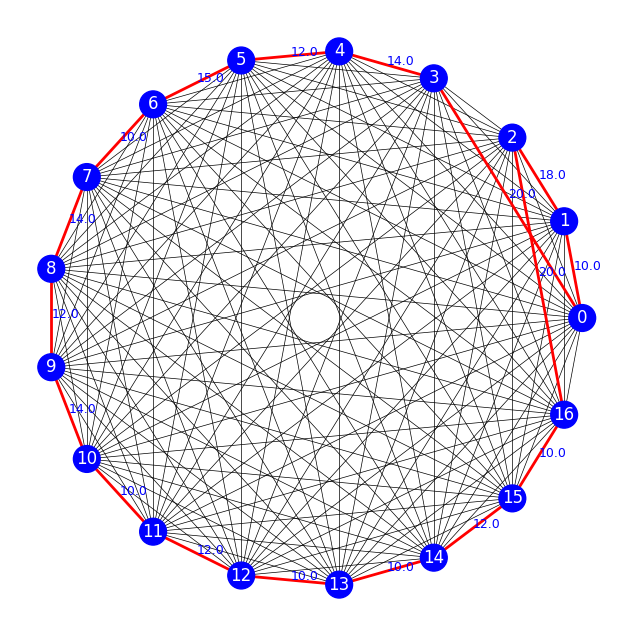

In [12]:
def generer_positions_circulaires(N):
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
    return np.column_stack([np.cos(angles), np.sin(angles)])

def visualiser_graphe_et_chemin_optimal_avec_couts(matrice_distances, chemin_optimal):
    N = len(matrice_distances)
    positions = generer_positions_circulaires(N)

    fig, ax = plt.subplots(figsize=(8, 8))

    # Dessiner toutes les connexions en noir
    for i in range(N):
        for j in range(i + 1, N):
            start_pos, end_pos = positions[i], positions[j]
            ax.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]],
                    color='black', zorder=1, lw=0.5)

    # Dessiner le chemin optimal en rouge avec les coûts
    for i in range(len(chemin_optimal) - 1):
        start_pos, end_pos = positions[chemin_optimal[i]], positions[chemin_optimal[i + 1]]
        ax.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'ro-', zorder=2, lw=2)
        # Calcul du milieu de la ligne pour la position du texte
        mid_point = (start_pos + end_pos) / 2
        cout = matrice_distances[chemin_optimal[i], chemin_optimal[i + 1]]
        ax.text(mid_point[0], mid_point[1], f'{cout}', color='blue', fontsize=9, zorder=3)

    # Dessiner les nœuds
    for i, pos in enumerate(positions):
        ax.add_patch(plt.Circle(pos, 0.05, color='blue', zorder=4))
        ax.text(pos[0], pos[1], str(i), ha='center', va='center', color='white', fontsize=12, zorder=5)

    ax.set_aspect('equal')
    plt.axis('off')
    plt.show()

parcours_init, cout_init = plus_proche_voisin(matrice_distances)
print("Solution initiale (Plus Proche Voisin):", parcours_init)
print("Coût de la solution initiale:", cout_init)

chemin_optimal, cout_optimal = branch_and_bound(matrice_distances, cout_init)
print("Chemin optimal:", chemin_optimal)
print("Coût optimal:", cout_optimal)
visualiser_graphe_et_chemin_optimal_avec_couts(matrice_distances, chemin_optimal)
